## Step 1: Reading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
  clothesData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data archive/Dataset 6/clothes_price_prediction_data.csv')

except:
  clothesData = pd.read_csv('/content/drive/MyDrive/Capstone project/kaggle_data/clothes_price_prediction_data.csv')

In [4]:
print("This is the shape of the data frame", clothesData.shape)

# Data Cleaning
clothesData.dropna(inplace=True)
print("This is the shape of the data frame after cleaning empty values", clothesData.shape)
clothesData.drop_duplicates(inplace=True)
print("This is the shape of the data frame after cleaning duplicated values", clothesData.shape)

This is the shape of the data frame (1000, 6)
This is the shape of the data frame after cleaning empty values (1000, 6)
This is the shape of the data frame after cleaning duplicated values (1000, 6)


In [160]:
clothesData.head(10)

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
5,Reebok,Jacket,Red,XL,Nylon,19
6,Puma,Jacket,Red,XXL,Polyester,31
7,Adidas,Dress,Red,XS,Denim,46
8,Reebok,Dress,Black,S,Wool,97
9,Adidas,Jeans,Yellow,L,Wool,80


## Key observations from step one
The data frame has 6 categories, with 1000 rows of data. There were no duplicate or empty values that needed to be cleaned.

* Brand:      The brand of clothing
* Category:   The category of the clothing item
* Color:      The colour of the clothing item
* Size:       The size of the clothing item
* Material:   The main material used to create the item
* Price:      The price of the item

* This file contains information on 1000 different clothing items
* There are 6 data attributes and they are outlined below:
* Brand - The brand of clothing
* Category - The type of clothing
* Color - The color of the clothing item
* Size - The size of the clothing item
* Material - The material of the item
* Price - The sell price of the item



## Step 2: Problem statement definition

* To predict the price of a clothing item based on the other categories

## Step 3: Target Variable Identification

* The target variable will be Price

* Brand, Category, Color, Size and Material will be the independent variables for now

## Step 4: Visualising the distribution of target variable

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

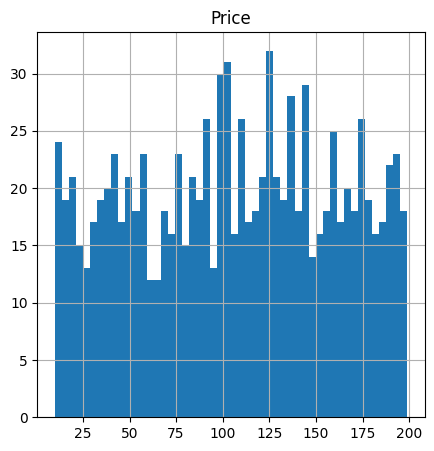

In [117]:
clothesData.hist("Price", bins=50, figsize=(5, 5))

## Step 5: Data Exploration on a basic level

In [ ]:
# Printing information about the Price category
clothesData["Price"].describe()

,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


In [43]:
clothesData.nunique()

,0
Brand,6
Category,6
Color,6
Size,6
Material,6
Price,190


### Observations of this data:


* Brand - Categorical
* Category - Categorical
* Color - Categorical
* Size - Categorical
* Material - Categorical
* Price - Continuous


In [ ]:
# Printing a sample of the data
clothesData.head(10)

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
5,Reebok,Jacket,Red,XL,Nylon,19
6,Puma,Jacket,Red,XXL,Polyester,31
7,Adidas,Dress,Red,XS,Denim,46
8,Reebok,Dress,Black,S,Wool,97
9,Adidas,Jeans,Yellow,L,Wool,80


In [ ]:
clothesData.tail(10)

,Brand,Category,Color,Size,Material,Price
990,Nike,Jacket,Green,M,Silk,12
991,Under Armour,Jacket,Red,XL,Silk,18
992,Puma,Sweater,Blue,S,Cotton,20
993,Puma,Sweater,Green,XXL,Cotton,15
994,New Balance,Jeans,Black,M,Polyester,48
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69
999,New Balance,Jacket,Yellow,XS,Wool,174


In [ ]:
clothesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
clothesData.describe(include="all")

,Brand,Category,Color,Size,Material,Price
count,1000,1000,1000,1000,1000,1000.000000
unique,6,6,6,6,6,NaN
top,Under Armour,Jacket,Yellow,XS,Polyester,NaN
freq,179,191,173,196,175,NaN
mean,NaN,NaN,NaN,NaN,NaN,106.289000
std,NaN,NaN,NaN,NaN,NaN,53.695444
min,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,NaN,NaN,59.750000
50%,NaN,NaN,NaN,NaN,NaN,108.000000
75%,NaN,NaN,NaN,NaN,NaN,150.000000


## Step 6: Identifying and rejecting useless columns

* Not much of a correlation between categories
* Material barely has any correlation with Price

## Step 7: Visual Exploratory Data Analysis of Data

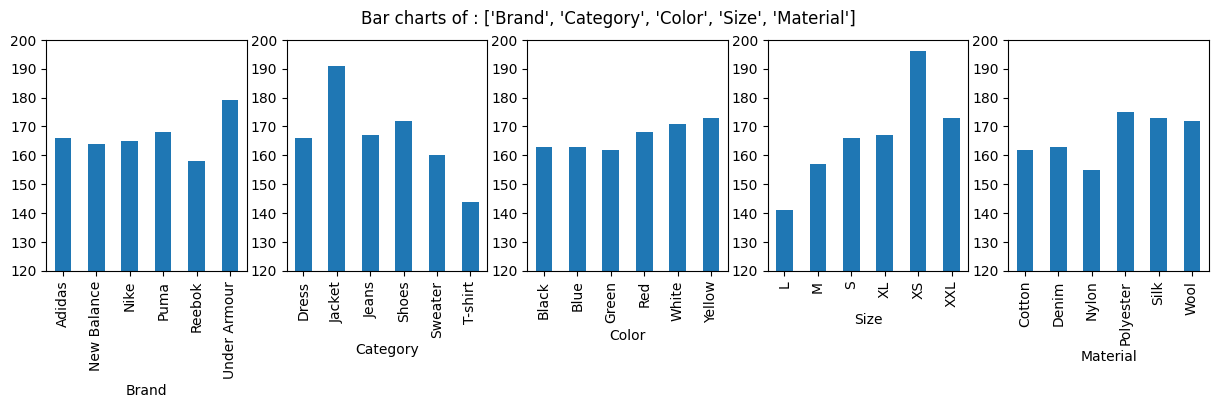

In [118]:
# Bar Graphs of each qualitative data column
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline

  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(15, 3))
  fig.suptitle("Bar charts of : " + str(colsToPlot))

  # Looping through the columns

  for colName, plotnumber in zip(colsToPlot, range(len(colsToPlot))):
    # Plotting the bar chart
    subPlot[plotnumber].set_ylim(120, 200)
    inpData.groupby(colName).size().plot(kind="bar", ax=subPlot[plotnumber])

PlotBarCharts(inpData=clothesData, colsToPlot=["Brand", "Category", "Color", "Size", "Material"])

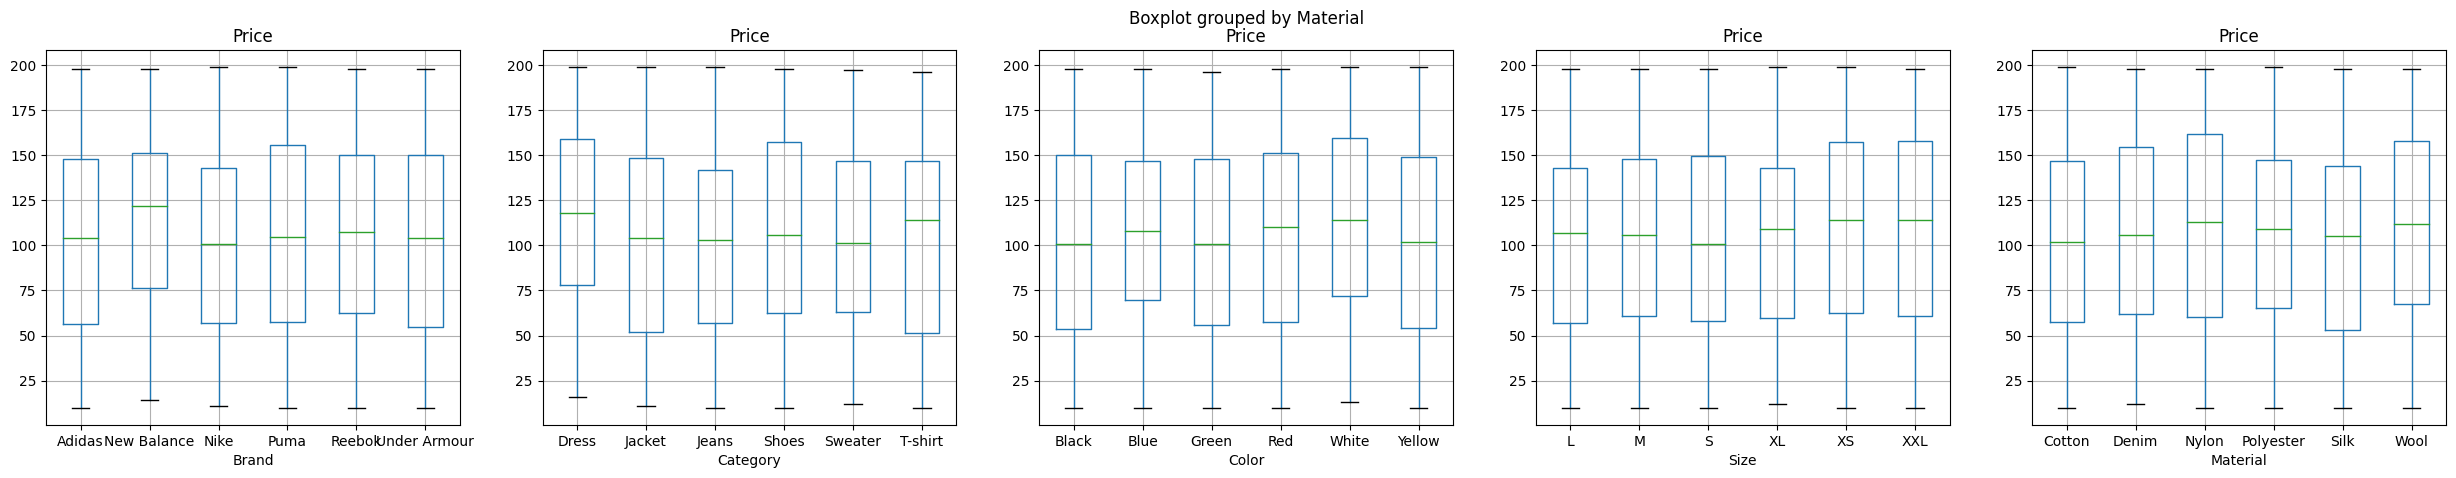

In [119]:
# Box plots for continuous Target Variable "Price" and Categorical predictors
CategoricalColsList=["Brand", "Category", "Color", "Size", "Material"]
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(30,5))
# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  clothesData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

There does not seem to be much of a correlation between Price and any of the categorical predictors...

## Step 8: Feature Selection based on Data Distribution

## Step 9: Removal of Outliers and Missing Values

In [152]:
# Finding how many missing values are there for each column
clothesData.isnull().sum()

,0
Brand,0
Category,0
Color,0
Size,0
Material,0
Price,0


## Step 10: Converting strings to int for correlation analysis and machine learning algorithms

In [5]:
for category in clothesData.columns:
  if clothesData[category].dtype == 'object':
    clothesData[category] = clothesData[category].astype('category')
    clothesData[category] = clothesData[category].cat.codes
    clothesData[category] = clothesData[category].astype('int64')
clothesData.to_csv('clothesData.csv', index=False)
print("File created")
clothesData.head()

File created


,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113


## Step 11: Visual and Statistic Correlation Analysis for Selection of Best Features

In [162]:
# Calculating correlation matrix
ContinuousCols=["Brand", "Category", "Color", "Size", "Material", "Price"]

# Creating the correlation matrix
CorrelationData=clothesData[ContinuousCols].corr()
CorrelationData

,Brand,Category,Color,Size,Material,Price
Brand,1.000000,-0.017533,0.031040,0.015400,-0.003992,-0.021353
Category,-0.017533,1.000000,0.006440,-0.020715,-0.059936,-0.025188
Color,0.031040,0.006440,1.000000,0.035097,0.024932,0.026571
Size,0.015400,-0.020715,0.035097,1.000000,0.004719,0.028882
Material,-0.003992,-0.059936,0.024932,0.004719,1.000000,0.008043
Price,-0.021353,-0.025188,0.026571,0.028882,0.008043,1.000000


In [163]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway
  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

  return(SelectedPredictors)



# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=["Brand", "Category", "Size", "Color", "Material"]
FunctionAnova(inpData=clothesData,
TargetVariable='Price',
CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Brand is NOT correlated with Price | P-Value: 0.2601099878167752
Category is NOT correlated with Price | P-Value: 0.22576473150531826
Size is NOT correlated with Price | P-Value: 0.7098835429591747
Color is NOT correlated with Price | P-Value: 0.4617893742587683
Material is NOT correlated with Price | P-Value: 0.7365826899195708


[]

In [147]:
TargetVariable = 'Price'
X=clothesData[CategoricalPredictorList].values
y=clothesData[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [148]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=CategoricalPredictorList)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.006682029030341097

##### Model Validation and Accuracy Calculations ##########
   Brand  Category  Size  Color  Material  Price  PredictedPrice
0    1.0       0.0   0.4    0.4       0.2    101           104.0
1    0.2       0.0   1.0    0.8       0.4    164           116.0
2    0.8       0.2   0.6    0.8       1.0     58           109.0
3    0.4       1.0   0.6    0.0       1.0     82           104.0
4    0.2       1.0   0.6    0.2       0.0    177           106.0
Mean Accuracy on test data: -0.84910074285456
Median Accuracy on test data: 63.45029239766082

Accuracy values for 10-fold Cross Validation:
 [ 14.50010712 -16.15473466 -20.57668045  13.09281756   3.37835864
  22.45952268  44.47706989  -1.11246404  -7.30294289   3.05268312]

Final Average Accuracy of the model: 5.58


To be expected, the independent variables only have 6 categorys each. There are not enough categories to treat the data as continuous. Thus, the average accuracy of the model is very low.

## Random Tree Algorithm

In [159]:
# One-hot encoding
# Converting clothesData to an array of boolean values

try:
  clothesData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data archive/Dataset 6/clothes_price_prediction_data.csv')

except:
  clothesData = pd.read_csv('/content/drive/MyDrive/Capstone project/kaggle_data/clothes_price_prediction_data.csv')

clothesData_Bool = pd.get_dummies(clothesData, drop_first=True)
clothesData_Bool.iloc[:,5:].head(5)
clothesData_Bool.to_csv('clothesData_Bool.csv', index=False)
print("File created")

File created


In [181]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(clothesData['Price'])
# Remove the labels from the clothesData
# axis 1 refers to the columns
clothesData = clothesData.drop('Price', axis = 1)
# Saving feature names for later use
clothes_list = list(clothesData.columns)
# Convert to numpy array
clothesData = np.array(clothesData)

In [182]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(clothesData, labels, test_size = None, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (750, 5)
Training Labels Shape: (750,)
Testing Features Shape: (250, 5)
Testing Labels Shape: (250,)


Creating a baseline to test the algorithm on. If we can't beat the baseline, then the algorithm sucks

In [189]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, clothes_list.index('Brand')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  103.84


In [184]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [190]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 49.56 degrees.


In [186]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -6.64 %.


A huge improvement; the baseline error has been effectively halved but the model is only ~50% correct

In [187]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = clothes_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [188]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = clothes_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

A simplified tree for better visibility

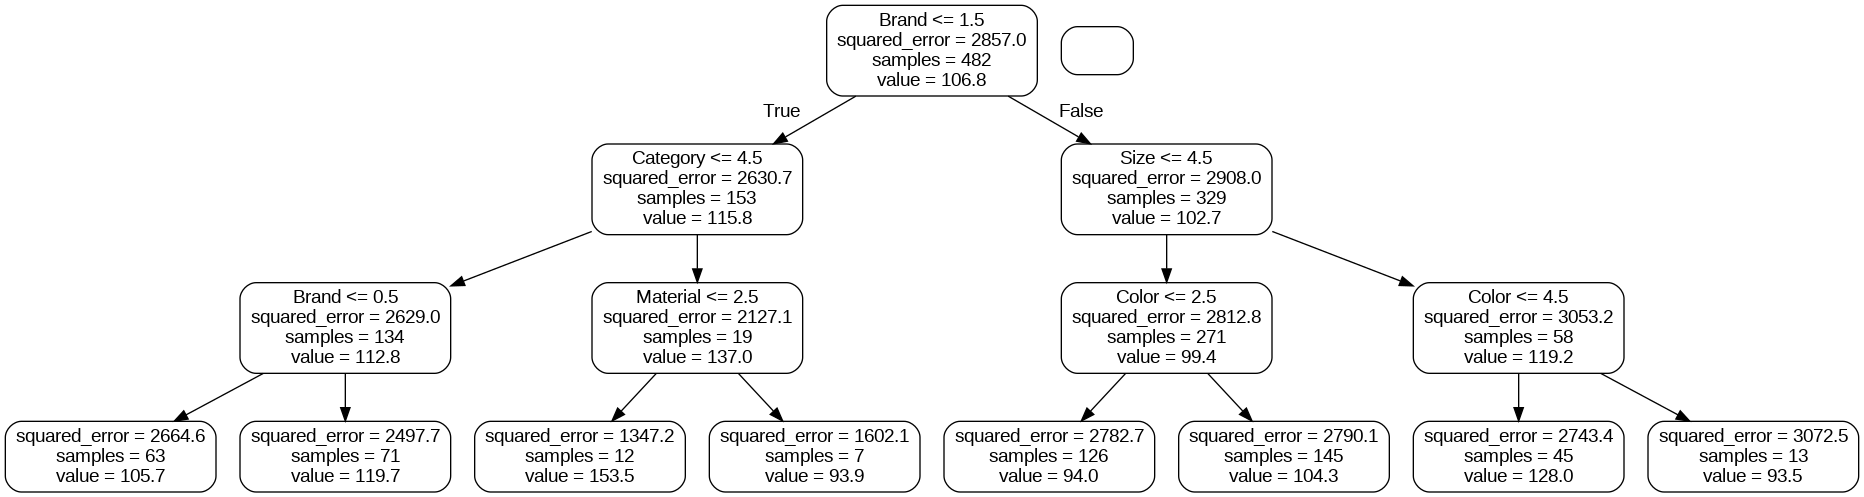